# Introduction

## Code dependencies

In [1]:
import SimpleITK as sitk

import os
import sys
InDir = "F:/Box Sync/Research/Polarimetry/Jupyter Analysis/Polscope_BasicCorrected/Large/"
OutDir = "F:/Box Sync/Research/Polarimetry/RAnalysis/"

import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma

from myshow import myshow

## Utility functions

In [2]:
def polToDegree(itkImg, ceiling):
    # Convert the image to a numpy array for easy modification
    #npImg = sitk.GetArrayFromImage(itkImg)
    
    # Change from 16 bit integer, to a degrees.
    retImg = itkImg * (ceiling/65535) * (4/549) * 90
    #npImg = npImg * (ceiling/65535) * (4/549) * 90
    
   # retImg = sitk.GetImageFromArray(npImg)
    
    return retImg

# Code start

In [2]:
image = sitk.ReadImage(InDir + 'WP2.tif', sitk.sitkFloat32)

image = image - min(image)

print(min(image))

#Convert the image to degrees
#degImg = sitk.Cast(polToDegree(image,35), sitk.sitkFloat32)

KeyboardInterrupt: 

In [17]:
otsu_filter = sitk.OtsuThresholdImageFilter()
otsu_filter.SetInsideValue(0)
otsu_filter.SetOutsideValue(1)
seg = otsu_filter.Execute(image)



In [18]:
overlay = sitk.LabelOverlay(degImg,seg)

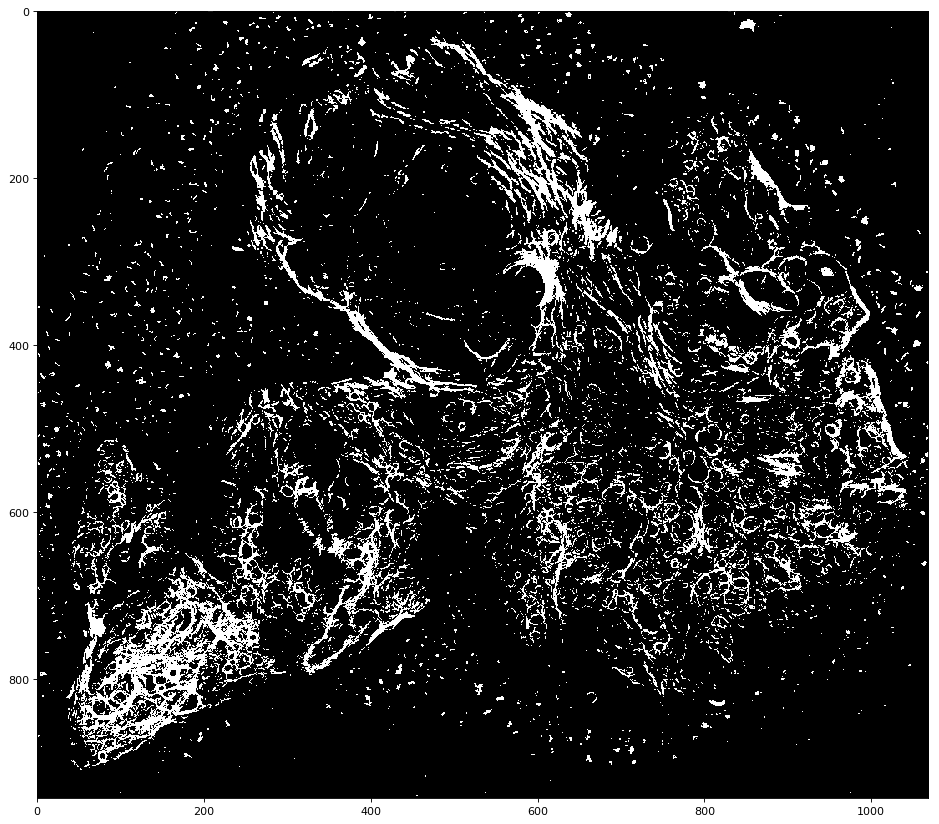

In [19]:
myshow(seg)

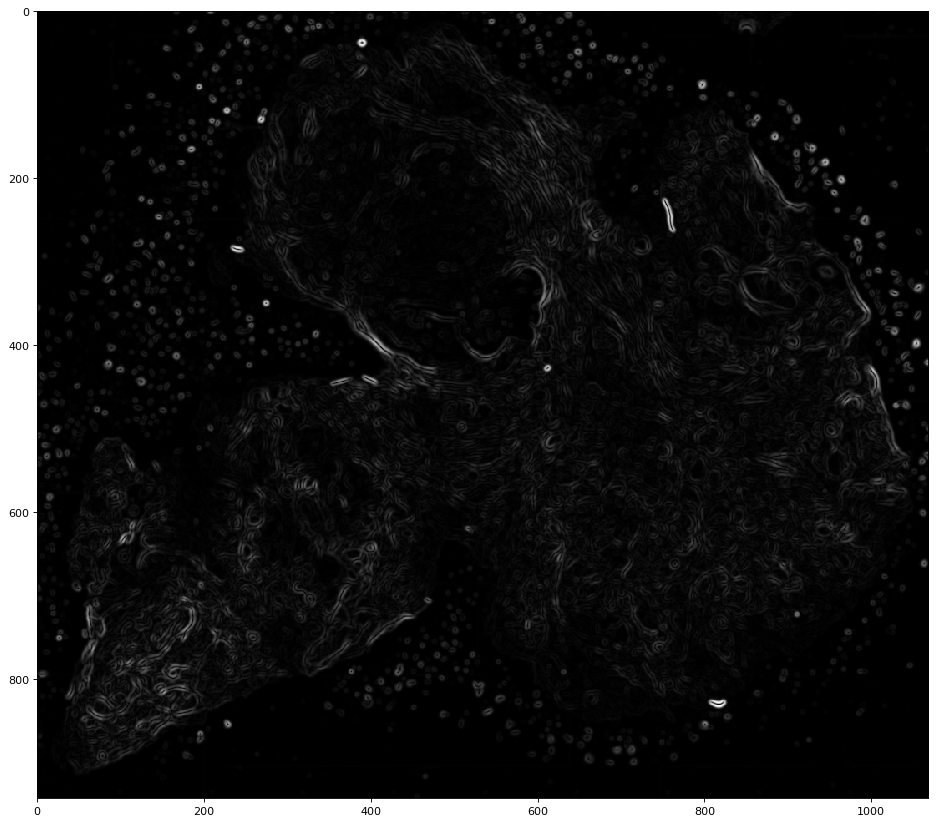

In [20]:
feature_image = sitk.GradientMagnitudeRecursiveGaussian(image, sigma=1.5)
myshow(feature_image)

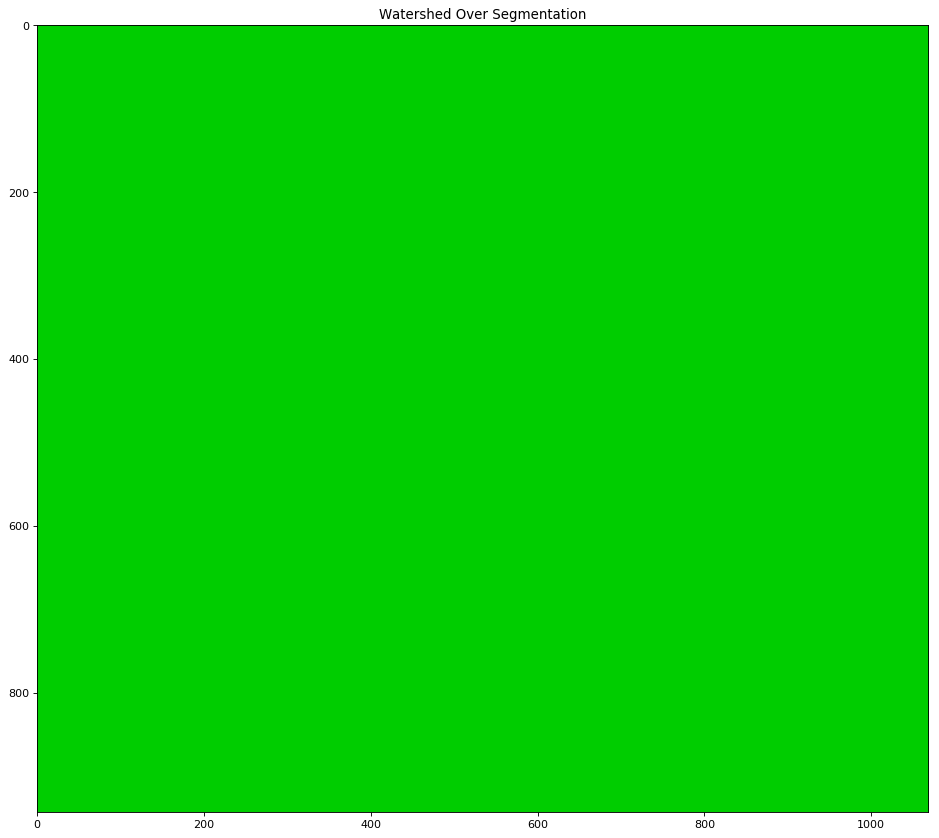

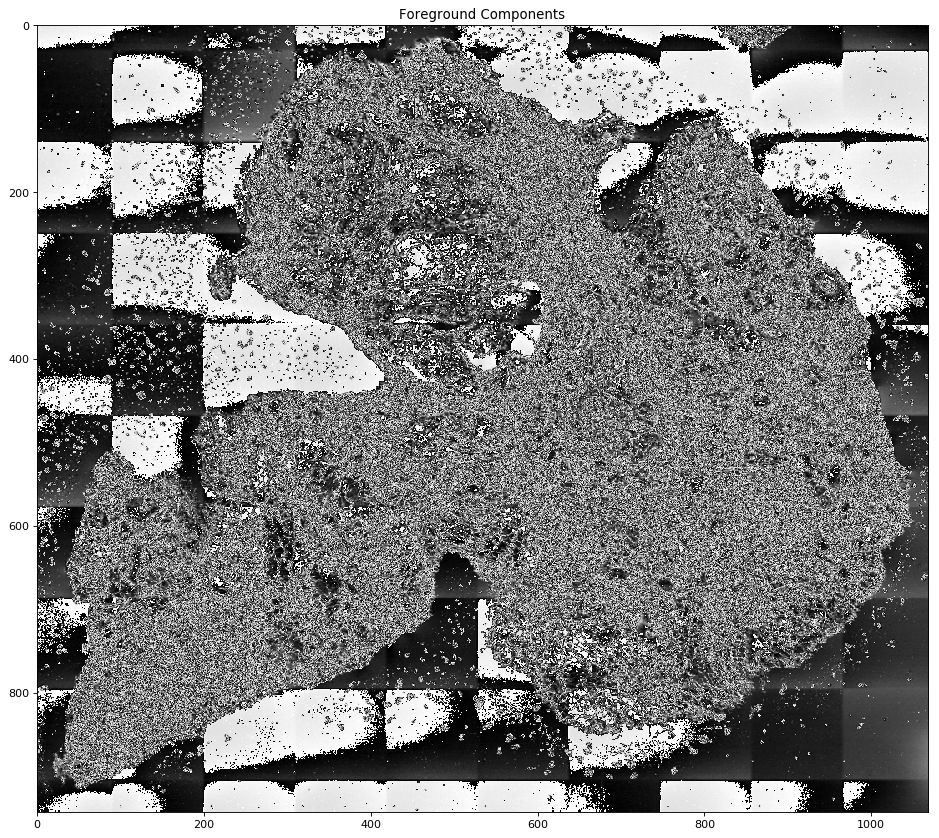

In [21]:
ws_img = sitk.MorphologicalWatershed(feature_image, level=4, markWatershedLine=False, fullyConnected=False)
myshow(sitk.LabelToRGB(ws_img), "Watershed Over Segmentation")
seg2 = sitk.ConnectedComponent(ws_img!=ws_img[0,0])
myshow(sitk.LabelOverlay(image, seg2), "Foreground Components")